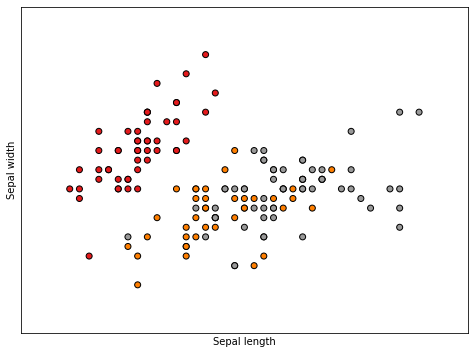

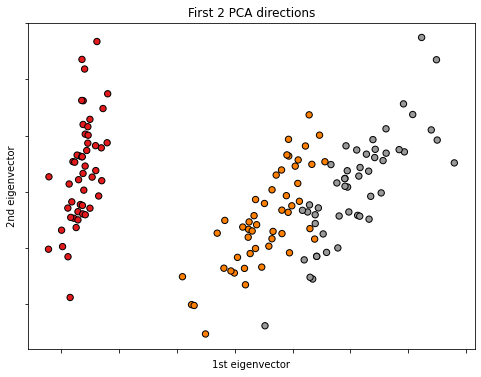

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA


In [57]:
iris = datasets.load_iris()

In [58]:

class MyPCA:
    def __init__(self, n_comps):
        self.n_comps = n_comps

    def fit_transform(self, X):
        translated_X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
        covar = np.cov(translated_X.T)
        eival, eivec = np.linalg.eigh(covar)
        ei_sort = np.flip(eival.argsort())
        
        eival = eival[ei_sort]
        eivec = eivec[ei_sort]
        prin_comp = np.take(eivec, np.arange(self.n_comps), axis=0)
        
        return np.matmul(translated_X, prin_comp.T)
    def var_exp(self, X):
        translated_X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
        covar = np.cov(translated_X.T)
        eival, eivec = np.linalg.eigh(covar)
        ei_sort = np.flip(eival.argsort())
        eival = eival[ei_sort]
        variance_explained = []
        for i in eival:
            variance_explained.append((i/sum(eival))*100)
        cum_sum_exp = np.cumsum(variance_explained)
        plt.bar(range(0,len(variance_explained)), variance_explained,alpha=1, align='center', label='Individual explained variance')
        plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component index')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    

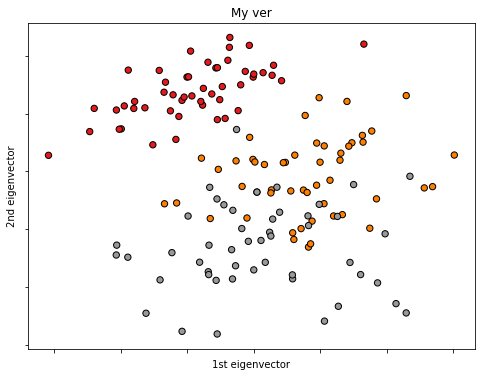

In [67]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()
X_myver = MyPCA(n_comps=2).fit_transform(iris.data)
ax.scatter(
    X_myver[:, 0],
    X_myver[:, 1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("My ver")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

plt.show()

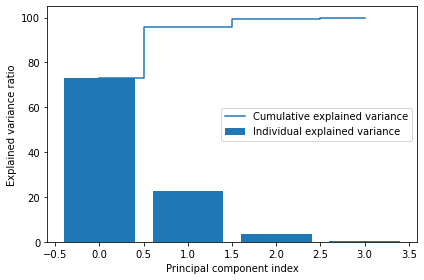

In [60]:
MyPCA(n_comps=2).var_exp(iris.data)

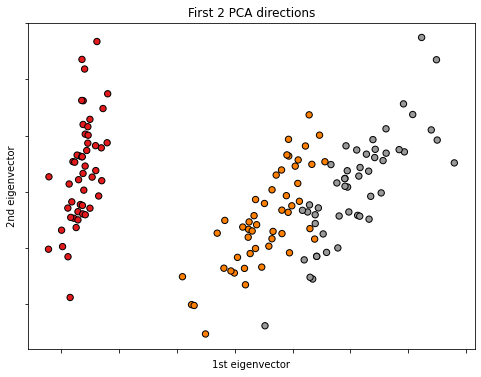

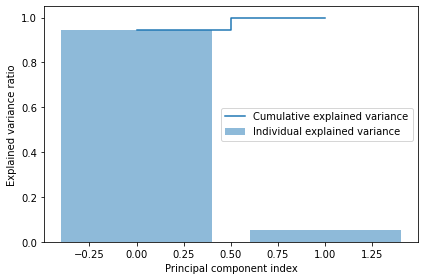

In [65]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)


ax.set_title("First 2 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

plt.show()

explained_variance = np.var(X_reduced, axis=0)
exp_var_pca = explained_variance / np.sum(explained_variance)

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()